How many states cover 50% of air traffic.  
In other words, when starting with the highest traffic state, how many states need to be counted until 50% of all traffic is accounted for.

I notice cities have the state code as the last two digits. I can take a count of all flights grouped by the state code.

In [12]:
import pgaccess as pg
import matplotlib.pyplot as plt

In [2]:
df = pg.execute_query('''
SELECT
    origin_city_name,
    COUNT(*)
FROM flights
WHERE
    arr_delay IS NOT NULL AND
    dep_delay IS NOT NULL
GROUP BY origin_city_name
''')
df

,origin_city_name,count
0,"Aberdeen, SD",1466
1,"Abilene, TX",4211
2,"Adak Island, AK",199
3,"Aguadilla, PR",4215
4,"Akron, OH",15948
...,...,...
363,"Wrangell, AK",1416
364,"Yakima, WA",2457
365,"Yakutat, AK",1403
366,"Youngstown/Warren, OH",2


In [4]:
df['state'] = df['origin_city_name'].str[-2:]
df

,origin_city_name,count,state
0,"Aberdeen, SD",1466,SD
1,"Abilene, TX",4211,TX
2,"Adak Island, AK",199,AK
3,"Aguadilla, PR",4215,PR
4,"Akron, OH",15948,OH
...,...,...,...
363,"Wrangell, AK",1416,AK
364,"Yakima, WA",2457,WA
365,"Yakutat, AK",1403,AK
366,"Youngstown/Warren, OH",2,OH


In [7]:
# Group by state, sum the flights
stateCounts = df[['state', 'count']].groupby('state').sum()
stateCounts

,count
state,
AK,80897
AL,85971
AR,64390
AZ,408106
CA,1711233
CO,610854
CT,60787
DC,461321
FL,1134215


It appears DC, Puerto Rico, and US Virgin Islands are included in the list.  
It appears Delaware doesn't get an entry in the list  
I'm not familiar with TT

In [8]:
df[df['state'] == 'TT']['origin_city_name'].value_counts()

Pago Pago, TT    1
Rota, TT         1
Guam, TT         1
Saipan, TT       1
Name: origin_city_name, dtype: int64

Pago Pago is American Samoa  
I can only assume that Rota is referring to the US Commonwealth of the Northern Mariana Islands
Guam _is_ one of the Mariana Islands, as is Saipan.

I'm not sure what 'TT' actually stands for, but it is being used as something of an 'other' category. I don't expect it to cause any kinds of problems, especially in the context of the current question.

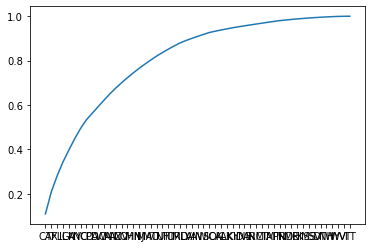

In [20]:
stateCounts = stateCounts.sort_values('count', ascending=False)
cumsum = stateCounts['count'].cumsum() / stateCounts['count'].sum()
plt.plot(cumsum)
plt.show()

In [23]:
# It's hard to tell from that plot
cumsum.iloc[:(cumsum < 0.5).sum() + 1]

state
CA    0.109616
TX    0.208302
FL    0.280956
IL    0.343615
GA    0.396971
NY    0.448322
NC    0.494342
CO    0.533471
Name: count, dtype: float64